In [ ]:
!pip install pandas numpy matplotlib seaborn nltk spacy yfinance requests transformers -q

KeyboardInterrupt: 

In [ ]:
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.12/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.12/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.12/dist-packages/spacy/compat.py", line 5, in <module>
  File "/usr/local/lib/python3.12/dist-packages/thinc/__init__.py", line 5, in <module>
    from .config import registry
  File "/usr/local/lib/python3.12/dist-packages/thinc/config.py", line 2, in <module>
    import confection
  File "/usr/local/lib/python3.12/dist-packages/confection/__init__.py", line 35, in <module>
    import srsly
  File "/usr/local/lib/python3.12/dist-packages/srsly/__init__.py", line 5, in <module>
    from ._msgpack_api i

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import spacy
import requests
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import kagglehub

path = kagglehub.dataset_download("sbhatti/financial-sentiment-analysis")

print("Path to dataset files:", path)

100%|██████████| 276k/276k [00:00<00:00, 51.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sbhatti/financial-sentiment-analysis/versions/4


In [ ]:
file_path = path + "/data.csv"
df = pd.read_csv(file_path, encoding="latin1")
print("\nLoaded Dataset Preview:")
print(df.head())


Loaded Dataset Preview:
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral


In [ ]:
# removing, NULL, duplicates and whitespace
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df["Sentence"] = df["Sentence"].str.strip()

# normalizing text to lowercase
df["Sentence"] = df["Sentence"].str.lower()

In [ ]:
#  label encoder

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df["Sentence"] = df["Sentence"].str.strip()
df["Sentiment"] = df["Sentiment"].str.lower()

# Label encoder
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["Sentiment"])

df['word_count'] = df['Sentence'].str.split().str.len()
avg_word_length = df['word_count'].mean()

# total sample entries
total_samples = len(df)
print(f"Total Sample Entries: {total_samples}")

# avg word length
print(f"Average Word Count per Entry: {avg_word_length:.2f} words")

# Class distribution
print("\nClass Distribution:")
print(df['Sentiment'].value_counts())



Total Sample Entries: 5836
Average Word Count per Entry: 21.00 words

Class Distribution:
Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64


========== DATASET SUMMARY ==========
Total Sample Entries: 5836

Class Distribution (Counts):
Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

Class Distribution (Percentage):
Sentiment
neutral     53.53
positive    31.73
negative    14.74
Name: proportion, dtype: float64

Sentence Length Statistics:
count    5836.000000
mean       21.000343
std        10.292617
min         2.000000
25%        13.000000
50%        19.000000
75%        27.000000
max        81.000000
Name: word_count, dtype: float64


/tmp/ipython-input-3919372707.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="Set2")


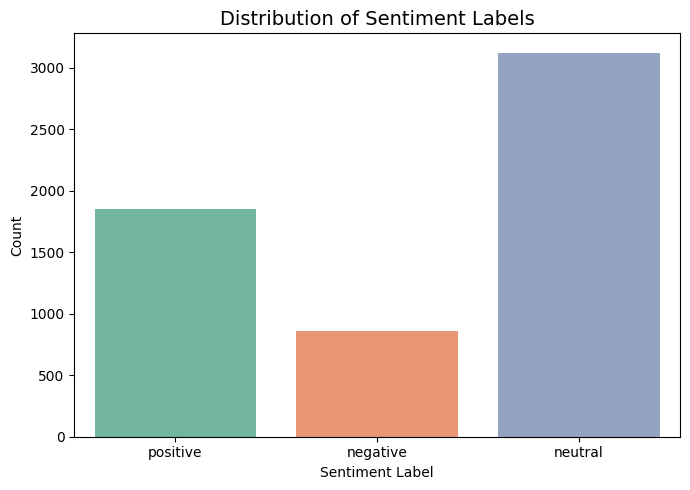

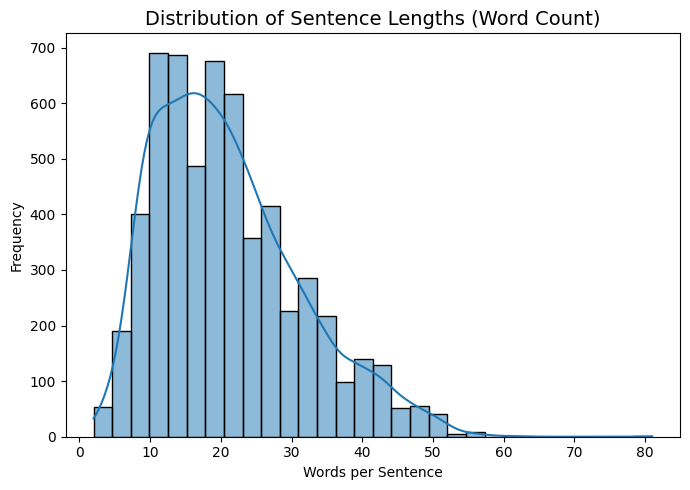

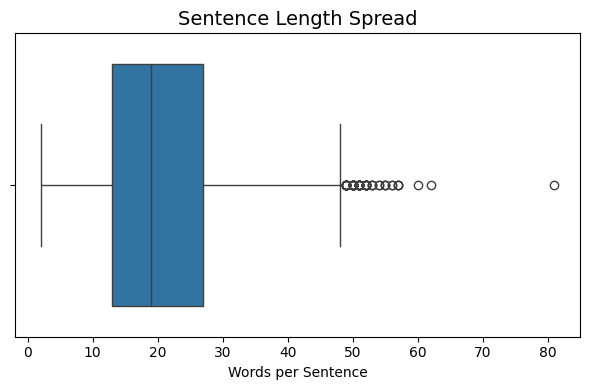

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------------------
# Dataset Summary (already cleaned above)
# -----------------------------------------
df['word_count'] = df['Sentence'].str.split().str.len()

print("========== DATASET SUMMARY ==========")
print(f"Total Sample Entries: {len(df)}")

print("\nClass Distribution (Counts):")
print(df["Sentiment"].value_counts())

print("\nClass Distribution (Percentage):")
print((df["Sentiment"].value_counts(normalize=True) * 100).round(2))

print("\nSentence Length Statistics:")
print(df["word_count"].describe())

# -----------------------------------------
# PLOT 1 — Label Distribution
# -----------------------------------------
plt.figure(figsize=(7,5))
sns.countplot(x="Sentiment", data=df, palette="Set2")
plt.title("Distribution of Sentiment Labels", fontsize=14)
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------------------
# PLOT 2 — Sentence Length Histogram
# -----------------------------------------
plt.figure(figsize=(7,5))
sns.histplot(df["word_count"], bins=30, kde=True)
plt.title("Distribution of Sentence Lengths (Word Count)", fontsize=14)
plt.xlabel("Words per Sentence")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# -----------------------------------------
# PLOT 3 — Sentence Length Boxplot (Optional)
# -----------------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x=df["word_count"])
plt.title("Sentence Length Spread", fontsize=14)
plt.xlabel("Words per Sentence")
plt.tight_layout()
plt.show()


In [ ]:
# training test split : 80/10/10

train_df, temp_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["Sentiment"]
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.5, random_state=42, stratify=temp_df["Sentiment"]
)

print("\n📊 SPLIT SUMMARY")
print("-" * 40)
print(f"Training Set: {len(train_df)} samples ({len(train_df)/total_samples*100:.1f}%)")
print(f"Validation Set: {len(val_df)} samples ({len(val_df)/total_samples*100:.1f}%)")
print(f"Testing Set: {len(test_df)} samples ({len(test_df)/total_samples*100:.1f}%)")



📊 SPLIT SUMMARY
----------------------------------------
Training Set: 4668 samples (80.0%)
Validation Set: 584 samples (10.0%)
Testing Set: 584 samples (10.0%)


In [ ]:
train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)            # Remove URLs
    text = re.sub(r'\$[A-Za-z]+', '', text)        # Remove stock tickers
    text = re.sub(r'[^a-z\s]', '', text)           # Remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()       # Normalize spaces
    return text

def preprocess_text(text):
    """
    1. Tokenize with spaCy
    2. Lemmatize
    3. Remove stopwords
    """
    text = clean_text(text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return " ".join(tokens)


for df_split in [train_df, val_df, test_df]:
    df_split['processed_text'] = df_split['Sentence'].apply(preprocess_text)

print("\nSample preprocessed text:")
print(train_df[['Sentence', 'processed_text']].head())

train_df.to_csv("train_processed.csv", index=False)
val_df.to_csv("val_processed.csv", index=False)
test_df.to_csv("test_processed.csv", index=False)

print("\nsaved: train_processed.csv, val_processed.csv, test_processed.csv")



Sample preprocessed text:
                                               Sentence  \
4256  raute , headquartered in nastola , finland , i...   
5712  lead production , in turn , should increase to...   
3005  news feedftse 100 movers: ashtead jumps on str...   
483   it comes complete with an lcd touch screen sys...   
2971  $utsi http://stks.co/15ur long setup. reported...   

                                         processed_text  
4256  raute headquarter nastola finland technology c...  
5712  lead production turn increase tonne would twof...  
3005  news feedftse mover ashtead jump strong interi...  
483   come complete lcd touch screen system selectio...  
2971                     long setup report good earning  

saved: train_processed.csv, val_processed.csv, test_processed.csv
